In [1]:
import pandas as pd
from sqlalchemy import create_engine
import psycopg2 
import matplotlib.pyplot as plt

In [2]:
engine = create_engine('postgresql+psycopg2://<username>:<password>@localhost:5432/employee_db')
conn = engine.connect()

In [3]:
employees_df = pd.read_sql('select * from employees', conn)
employees_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [4]:
salary_df = pd.read_sql('select * from salaries', conn)
salary_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


Text(0.5, 1.0, 'Most common salary ranges for employees')

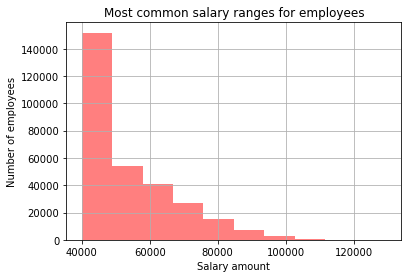

In [5]:
salary_df.hist(column='salary', color="red", alpha=0.5)
plt.xlabel('Salary amount')
plt.ylabel('Number of employees')
plt.title('Most common salary ranges for employees')

In [6]:
titles_df = pd.read_sql('select e.emp_no, t.title From titles t inner join employees e on t.title_id = e.emp_title_id \
                         order by 1', conn)
titles_df.head()

,emp_no,title
0,10001,Senior Engineer
1,10002,Staff
2,10003,Senior Engineer
3,10004,Senior Engineer
4,10005,Staff


In [7]:
# create a merged dataframe from titles and salaries
employee_salary_df = titles_df.merge(salary_df, on='emp_no')
employee_salary_df.head()

,emp_no,title,salary
0,10001,Senior Engineer,60117
1,10002,Staff,65828
2,10003,Senior Engineer,40006
3,10004,Senior Engineer,40054
4,10005,Staff,78228


In [8]:
employee_salary_avg = employee_salary_df.groupby("title")["salary"].mean().round(2)
employee_salary_avg.head()

title
Assistant Engineer    48564.43
Engineer              48535.34
Manager               51531.04
Senior Engineer       48506.80
Senior Staff          58550.17
Name: salary, dtype: float64

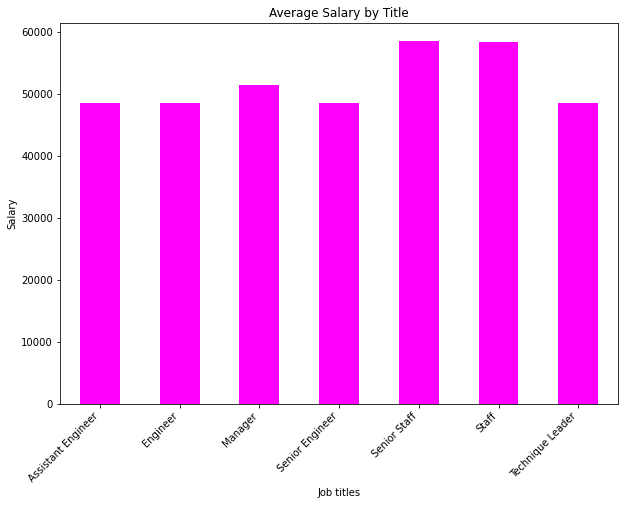

In [9]:
employee_salary_avg.plot(kind="bar", color="magenta", figsize=(10, 7))
#employee_salary_avg.plot.bar()

plt.xlabel("Job titles")
plt.ylabel("Salary")
plt.title("Average Salary by Title")
#plt.tight_layout()
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()